In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                                                                         #clothing
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Morad/Desktop/projects/project_2/HICP - clothing.csv ")

In [3]:
df = df.rename(columns = {
    "geo": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "price"
})
df_ = df[["country","year","price"]]   #chose the needed columns to calculate different function 

In [8]:
'''
chosen countries max =  Lithuania 
                 moderate = Ireland
                 min =  Cyprus, Italy
'''
#1
country = ["Lithuania", "Ireland", "Italy", "Cyprus"]
filtter_Graph = (df_["country"].isin(country))
df_ = df_.loc[filtter_Graph, ["country","year","price"]]
df_

,country,year,price
60,Cyprus,2024-11,105.11
61,Cyprus,2024-12,105.33
62,Cyprus,2025-01,90.95
63,Cyprus,2025-02,91.64
64,Cyprus,2025-03,94.59
65,Cyprus,2025-04,99.49
66,Cyprus,2025-05,102.08
67,Cyprus,2025-06,101.99
68,Cyprus,2025-07,88.36
69,Cyprus,2025-08,87.33


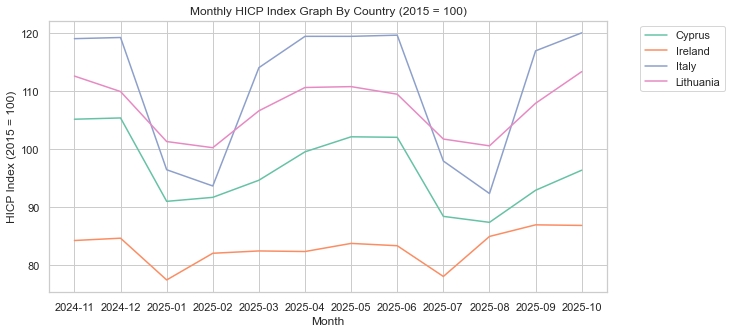

In [5]:
#fig1
sns.set_theme(style = "whitegrid")
plt.figure(figsize =(10,5))
sns.lineplot(data = df_  , x = "year", y = "price",hue = "country",palette = "Set2")     

plt.title("Monthly HICP Index Graph By Country (2015 = 100)")
plt.ylabel("HICP Index (2015 = 100)")
plt.xlabel("Month")
plt.legend(bbox_to_anchor= (1.05,1), loc ="upper left")

In [6]:
#2
total_change = (df_.groupby("country")
                .apply(lambda x : (x["price"].iloc[-1] / x["price"].iloc[0] -1 ) * 100)
                .reset_index(name = "total_change_pct")
            )
total_change

,country,total_change_pct
0,Cyprus,-8.362668
1,Ireland,3.087886
2,Italy,0.840336
3,Lithuania,0.675255


Text(0.5, 1.0, 'Cumulative Change % - Nov 2024 to Oct 2025')

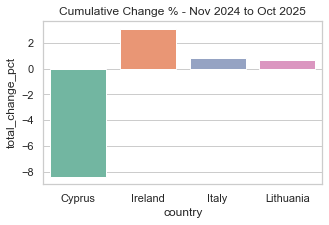

In [7]:
#fig2
sns.set_theme(style = "whitegrid")
plt.figure(figsize =(5,3))
sns.barplot(data = total_change ,x = "country" , y = "total_change_pct", palette = "Set2")    

plt.title("Cumulative Change % - Nov 2024 to Oct 2025")
